In [2]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending = pd.read_csv("../credit_risk/lending_data.csv")

# Review the DataFrame
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_lending["loan_status"]

# Separate the X variable, the features
X = df_lending.drop(columns=["loan_status"])

In [5]:
# Review the y variable Series
print("Labels (y variable):")
y.head()

Labels (y variable):


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
balance = y.value_counts()
balance

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)
print("Predicted values:")
y_pred

Predicted values:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Print the balanced_accuracy score of the model
accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9520479254722232


In [12]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18663   102]
 [   56   563]]


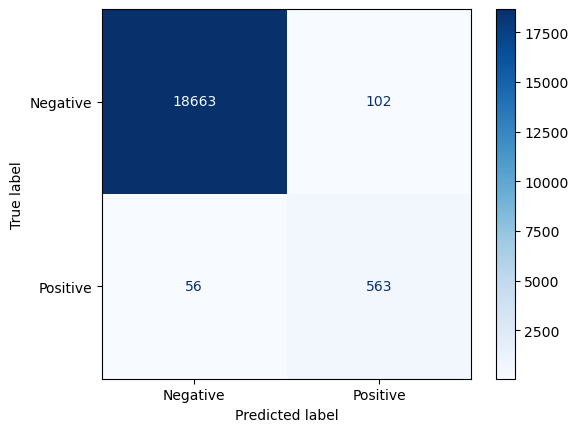

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
# Create a ConfusionMatrixDisplay instance
disp_original = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])

# Plot the confusion matrix with labeled rows and columns
disp_original.plot(cmap="Blues", values_format="d")

# Display the plot
plt.show()

#### Confusion matrix summary
True Negatives (TN): 18663,
False Positives (FP): 102,
False Negatives (FN): 56,
True Positives (TP): 563

In [34]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model demonstrates strong prediction performance for both "healthy loan" (label 0) and "high-risk loan" (label 1) categories:

For "healthy loan" (label 0): 
        - High precision values, indicates accurate identification of true 
        "healthy loan" cases among predicted cases.
        - High recall value, captures almost all true "healthy loan" cases 
        among actual cases.
        - High F1-score, shows a strong balance between precision and 
        recall.
 
For "high-risk loan" (label 1):
        - Good precision, reasonably accurate in identifying true "high-risk 
        loan" cases among predicted cases.
        - Good recall values, effectively identify a significant portion of 
        true "high-risk loan" cases among actual cases.
        - Good F1-score, shows a balanced performance between precision and 
        recall.  

Overall, the model's performance suggests that it is well-suited for predicting both "healthy loans" and "high-risk loans." However, as always, it's important to remember that false positives and missed warnings or false negatives could affect our analysis. 


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [18]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)  

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [20]:
# Count the distinct values of the resampled labels data
resampled_label_counts = y_train_resampled.value_counts()

print("Distinct Label Counts in Resampled Data:")
resampled_label_counts

Distinct Label Counts in Resampled Data:


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [23]:
from sklearn.linear_model import LogisticRegression
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_resampled = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred_resampled = model_resampled.predict(X_test)

print("Predicted values:")
y_pred_resampled

Predicted values:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [26]:
# Print the balanced_accuracy score of the model 
resampled_accuracy = balanced_accuracy_score(y_test, y_pred_resampled)
print("Resampled Model Accuracy Score:", resampled_accuracy)

Resampled Model Accuracy Score: 0.9936781215845847


In [29]:
# Generate a confusion matrix for the model
resampled_conf_matrix = confusion_matrix(y_test, y_pred_resampled)
print("Resampled Model Confusion Matrix:")
resampled_conf_matrix

Resampled Model Confusion Matrix:


array([[18649,   116],
       [    4,   615]], dtype=int64)

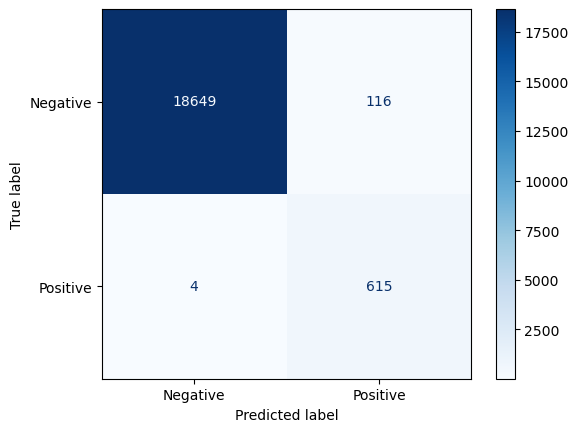

In [30]:
# Create a ConfusionMatrixDisplay instance
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=resampled_conf_matrix, display_labels=["Negative", "Positive"])

# Plot the confusion matrix with labeled rows and columns
disp_resampled.plot(cmap="Blues", values_format="d")

# Display the plot
plt.show()

#### Confusion matrix summary

True Negatives (TN): 18649, False Positives (FP): 116, False Negatives (FN): 4, True Positives (TP): 615


In [32]:
# Print the classification report for the model
resampled_class_report = classification_report(y_test, y_pred_resampled)
print("Resampled Model Classification Report:")
print(resampled_class_report)

Resampled Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model, fitted with oversampled data, predicts both "healthy loan" (label 0) and "high-risk loan" (label 1) labels with high accuracy, precision, and recall. The model does a good job classifying both types of loans, and it finds a good balance between being careful not to miss high-risk loans and not mistakenly flagging healthy loans as high-risk. This means the model can correctly guess both types of loans, making its predictions fair and dependable.

### Side-by-side Comparison of Confusion Matrix

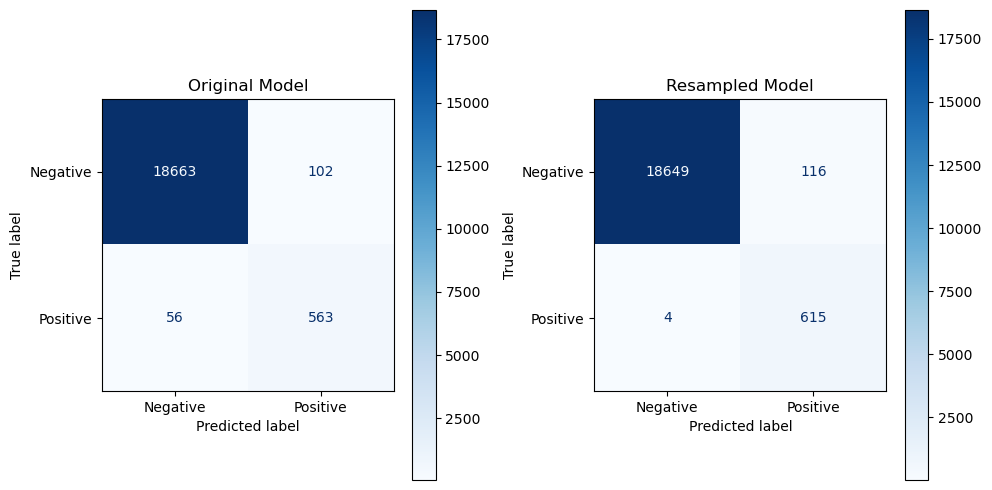

In [43]:
# Create a side-by-side comparison plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrices on separate axes
disp_original.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("Original Model")

disp_resampled.plot(ax=axes[1], cmap="Blues", values_format="d")
axes[1].set_title("Resampled Model")

# Display the plot
plt.tight_layout()
plt.show()

### Side-by-side Comparison of Classification Report

In [45]:
# Print the classification reports for both models side by side
print("Classification Report Comparison:")
print("=" * 20, "Original Model", "=" * 20)
print(class_report)
print("=" * 20, "Resampled Model", "=" * 20)
print(resampled_class_report)

Classification Report Comparison:
==================== Original Model ====================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

==================== Resampled Model ====================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

